# Discrete Optimal Transport with CVXPY

**January 27, 2023**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import cvxpy as cp

## Optimal Transport

A **discrete optimal transport** problem is a special kind of network flow where we designate some nodes as **sources** and others as **targets**, we assign a **mass** to every node and we restrict the mass flow from source nodes to target nodes only. The goal is to determine the minimum cost to transport the mass distribution of source nodes to the mass  distribution target nodes.
  
Let $\mathbf{p}_1,\dots,\mathbf{p}_{n_s} \in \mathbf{R}^N$ be a collection of source nodes with masses $m_{\mathbf{p}_1},\dots,m_{\mathbf{p}_{n_s}}$ such that

$$
\sum_{i=1}^{n_s} m_{\mathbf{p}_i} = 1
$$

Let $\mathbf{q}_1,\dots,\mathbf{q}_{n_t} \in \mathbf{R}^N$ be a collection of target nodes with masses $m_{\mathbf{q}_1},\dots,m_{\mathbf{q}_{n_t}}$ such that

$$
\sum_{j=1}^{n_t} m_{\mathbf{q}_j} = 1
$$

Let $c_{ij}$ be the cost to move one unit of mass from source node $i$ to target node $j$ and let $C = [c_{ij}]$ be the **cost matrix** of size $n_s \times n_t$.

Define the cost $c_{ij}$ as the distance from source node $i$ to target node $j$

$$
c_{ij} = \| \mathbf{p}_i - \mathbf{q}_j \|
$$

In [2]:
ns = 30
nt = 50
sources = np.random.randn(ns,2) + 2*np.array([-1,-1])
targets = np.random.randn(nt,2) + 2*np.array([1,1])

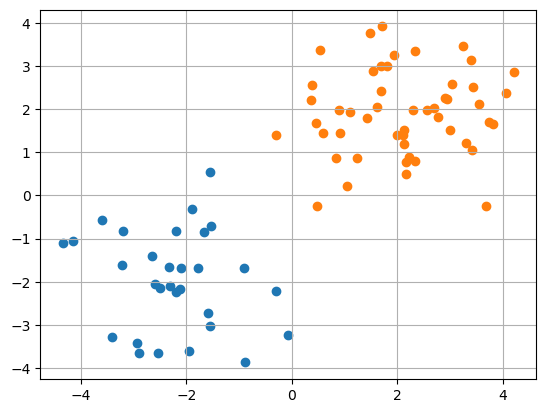

In [3]:
plt.scatter(sources[:,0],sources[:,1])
plt.scatter(targets[:,0],targets[:,1])
plt.grid(True)
plt.show()

In [4]:
C = np.zeros((ns,nt))
for i in range(0,ns):
    for j in range(0,nt):
        C[i,j] = la.norm(sources[i,:] - targets[j,:])

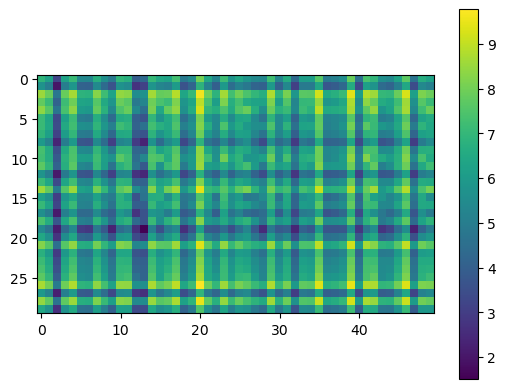

In [5]:
plt.imshow(C), plt.colorbar()
plt.show()

## Formulate as a Linear Optimization Problem

### Decision Variables

Let $x_{ij}$ be the mass moved from source node $i$ to target node $j$.

### Objective Function

We want to miminize the total cost

$$
\sum_{i=1}^{n_s} \sum_{j=1}^{n_t} c_{ij} x_{ij}
$$

### Constraints

Flow is nonnegative therefore $x_{ij} \geq 0$ for all $i,j$.

All mass at each source node must flow to target nodes:

$$
\sum_{j=1}^{n_t} x_{ij} = m_{\mathbf{p}_i} \ \ , \ \ \ i=1,\dots,n_s
$$

Each target node must receive all its mass:

$$
\sum_{i=1}^{n_s} x_{ij} = m_{\mathbf{q}_j} \ \ , \ \ \ j=1,\dots,n_t
$$

## Solve with CVXPY

In [6]:
X = cp.Variable((ns,nt))

In [7]:
obj = cp.Minimize(cp.sum(cp.multiply(C,X)))

In [8]:
constraints = [X >= 0]
for i in range(0,ns):
    constraints.append(cp.sum(X[i,:]) == 1/ns)
for j in range(0,nt):
    constraints.append(cp.sum(X[:,j]) == 1/nt)

In [9]:
problem = cp.Problem(obj,constraints)

In [10]:
problem.solve()

5.822270395443421

## Visualize Results

In [11]:
Xvalues = np.zeros((ns,nt))
for i in range(0,ns):
    for j in range(0,nt):
        Xvalues[i,j] = X[i,j].value

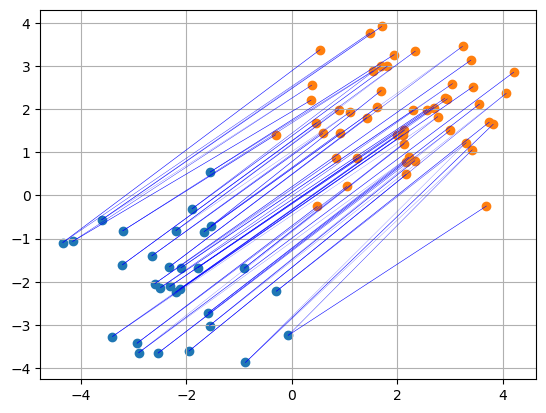

In [12]:
for i in range(0,ns):
    for j in range(0,nt):
        if Xvalues[i,j] > 0:
            plt.plot([sources[i,0],targets[j,0]],[sources[i,1],targets[j,1]],'b-',lw=20*Xvalues[i,j])

plt.scatter(sources[:,0],sources[:,1])
plt.scatter(targets[:,0],targets[:,1])
plt.grid(True)
plt.show()

## References

* [CVXPY Documentation](https://www.cvxpy.org)
* [Wikipedia: Optimal Transport](https://en.wikipedia.org/wiki/Transportation_theory_(mathematics))
* [Computational Optimal Transport](https://optimaltransport.github.io)